## S04 T01: Visualització gràfica d'un dataset

### Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

    - Una variable categòrica (UniqueCarrier)
    - Una variable numèrica (ArrDelay)
    - Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
    - Dues variables numèriques (ArrDelay i DepDelay)
    - Tres variables (ArrDelay, DepDelay i UniqueCarrier)
    - Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Visualization for a categorical variable (UniqueCarrier)

#I will use Matplotlib library for this case
#First, we need to load the data and select the columns which contain the info requested:

df=pd.read_csv('/Users/Diana/Documents/IT Academy/Data Science/S03 T05/archive/DelayedFlights.csv')
df.dropna()
airlines=df[['UniqueCarrier','AirTime','ArrDelay','DepDelay']].copy()
airlines.head()

,UniqueCarrier,AirTime,ArrDelay,DepDelay
0,WN,116.0,-14.0,8.0
1,WN,113.0,2.0,19.0
2,WN,76.0,14.0,8.0
3,WN,77.0,34.0,34.0
4,WN,87.0,11.0,25.0


In [22]:
#Prepare the data

flights_by_airline=airlines.UniqueCarrier.value_counts()  #count the number of observation by airline
percentage_flights_by_airline=round(airlines.UniqueCarrier.value_counts(normalize=True)*100,1).to_frame()  #normalize argument gives us the ratio automatically
percentage_flights_by_airline.rename(columns={
    'UniqueCarrier':'% of Flights per year',
  }, inplace=True)
percentage_flights_by_airline['Number of flights by year']=flights_by_airline
# Reorder it based on the values
percentage_flights_by_airline_ordered = percentage_flights_by_airline.sort_values(by='% of Flights per year', ascending=True)
percentage_flights_by_airline_ordered 

,% of Flights per year,Number of flights by year
AQ,0.0,750
HA,0.4,7490
F9,1.5,28269
AS,2.0,39293
9E,2.7,51885
OH,2.7,52657
B6,2.9,55315
YV,3.5,67063
FL,3.7,71284
NW,4.1,79108


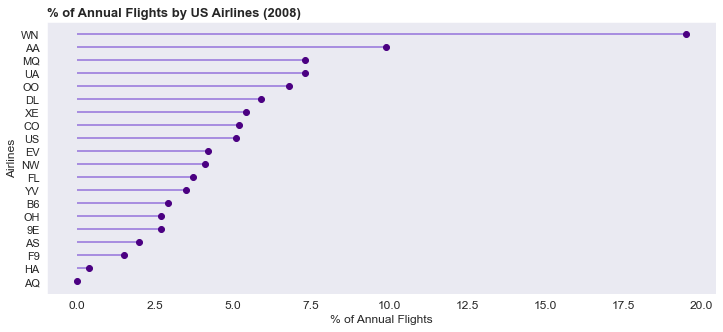

In [46]:
#To visualize the data I will use a Lollipop chart

plt.figure(figsize=(12, 5))  #set the size of the chart

#defining the x and y values

x=percentage_flights_by_airline_ordered['% of Flights per year']
y=percentage_flights_by_airline_ordered.index

#The horizontal plot is made using the hline function

plt.hlines(y, xmin=0, xmax=x, color='mediumpurple')
plt.plot(x, y, "o", color='indigo')

#to add the title and x, y labels, and fontsize

plt.title("% of Annual Flights by US Airlines (2008)", loc='left', size=13, fontweight="bold")
plt.xlabel('% of Annual Flights', size=12)
plt.ylabel('Airlines', size=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

#save the plot as an image
plt.savefig('Annual Flights by US Airlines.jpg')

plt.show()

Southwest airlines (WN) is by far the airline with more operations during 2008 with almost 20% of total flights.
The second one is American Airlines (AA) with roughly 10% of total operations.
Hawaian Airlines (HA) and 9 Air (AQ) are the airlines with less operations.

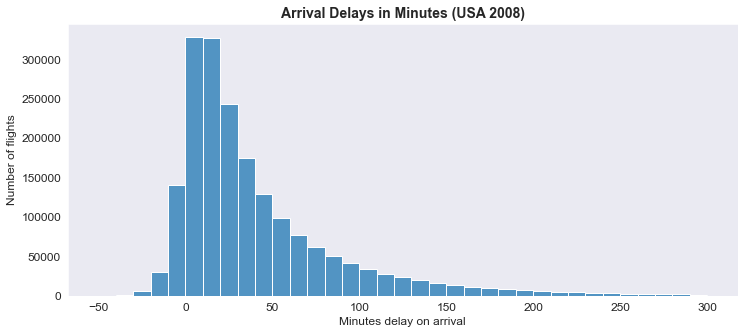

In [47]:
#Una variable numèrica (ArrDelay)
#We would like to know the frequency of arrival delays. Which are the most frequent? 

plt.figure(figsize=(12,5))
plt.xlabel('Minutes delay on arrival', size=12)
plt.ylabel('Number of flights', size=12)
plt.title('Arrival Delays in Minutes (USA 2008)', loc='center', size=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)   

#I will use seaborn library this time

sns.set_style('darkgrid')  #setting the style of the chart with a grey grid
sns.histplot(airlines.ArrDelay,binwidth=10,binrange=(-50,300)   #defining the data (ArrDelay), the binwidth=10 (column width equals 10 minutes delay), and the bin range
            );

plt.savefig('Arrival Delays in Minutes.png')

As each column represents 10 minutes of delay, we can say that most of the flights are concentrated on 20 minutes of delay. Beyond that, the number of flights with more than 10 mins delay starts to decrease.

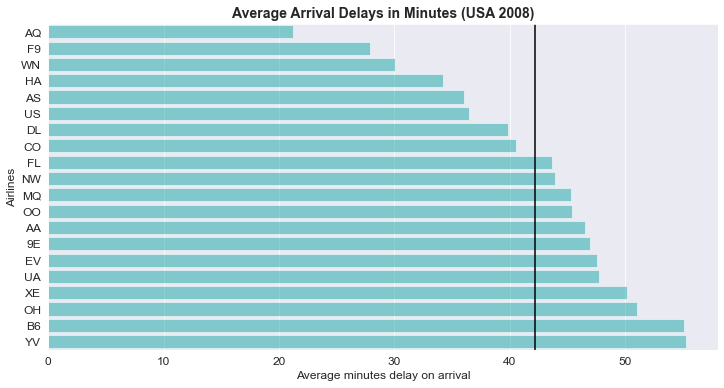

In [48]:
#Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

#I'll create a barplot with the average arrival delay by airline

airlines_delay=airlines.ArrDelay.groupby(airlines.UniqueCarrier).mean()
airlines_delay=airlines_delay.sort_values(ascending=True)
average_delays=airlines.ArrDelay.mean()

sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(x=airlines_delay, y=airlines_delay.index, color='c', alpha=0.5)
plt.axvline(average_delays, c='black')   #draws a line with the average of all observations under arrival delays

plt.title('Average Arrival Delays in Minutes (USA 2008)', loc='center', size=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel('Average minutes delay on arrival', size=12)
plt.ylabel('Airlines', size=12)

plt.savefig('Average Arrival Delays in Minutes.png')

plt.show()

The average delay of all observations is 42 mins.

We can infer from the chart that AQ, F9, and WN are the airlines with the best performance with delays up to 30 mins on average, performing above average.

On the other side, OH, B6, and YV are the worst performing airlines with delays over 50 mins on average, performing worse than average.

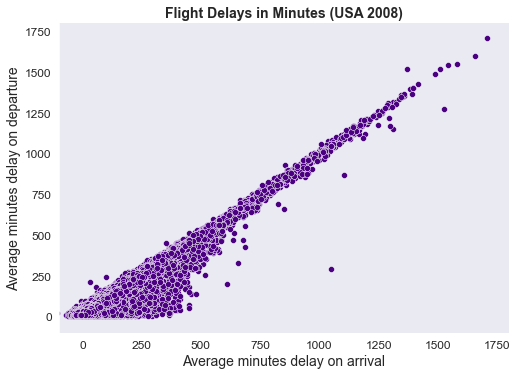

In [57]:
#Dues variables numèriques (ArrDelay i DepDelay): I'll use a scatter plot

sns.set_style('dark')

chart=sns.relplot(x='ArrDelay', y='DepDelay', color='indigo', aspect=10/7, data=airlines)

#using some matplot features to personalize the chart
plt.xlim(-100, 1800)
plt.ylim(-100, 1800)
chart.ax.set_title('Flight Delays in Minutes (USA 2008)', loc='center', size=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel('Average minutes delay on arrival', size=14)
plt.ylabel('Average minutes delay on departure', size=14)

chart.savefig('Flight Delays in Minutes.png')

plt.show()

As we can infer from the chart there is a correlation between departure delay and arrival delay but we have to take this assumption carefully because some of the flights appear to have no delay or a few minutes delay but their delay on arrival is quite large.

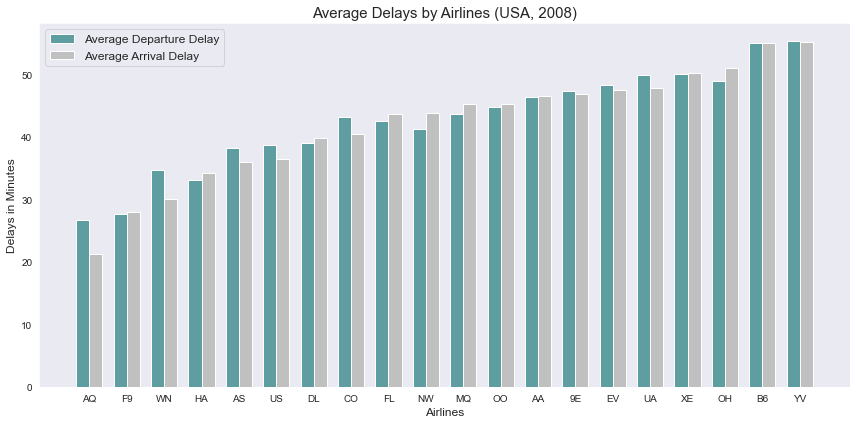

In [50]:
#Tres variables (ArrDelay, DepDelay i UniqueCarrier): i'll use a bar chart to represent the data

airline_delays = airlines[['DepDelay','ArrDelay']].groupby(airlines.UniqueCarrier).mean()
airline_delays = airline_delays.sort_values('ArrDelay')

labels=airline_delays.index
departure_average=airline_delays.DepDelay
arrival_average=airline_delays.ArrDelay


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.rcParams['figure.figsize'] = [12, 6]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, departure_average, width, label='Average Departure Delay', color='cadetblue')
rects2 = ax.bar(x + width/2, arrival_average, width, label='Average Arrival Delay', color='silver')

# Personalize labels and titles

ax.set_xlabel('Airlines', size=12)
ax.set_ylabel('Delays in Minutes', size=12)
ax.set_title('Average Delays by Airlines (USA, 2008)', size=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=12)

fig.tight_layout()

plt.savefig('Average Delays by Airlines.png')

plt.show()

It can be infered from the chart in some cases such as airlines AQ, WN, and US de departure delay is longer than the arrival delay meaning that some minutes have been saved during flight time. In other cases like FL, NW, and OO the flight time didn't compensate the departure delay but generated even more delay on arrival 

In [38]:
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).
#I'll create a dataframe with the average of all delays + average air time

grouped=airlines.groupby('UniqueCarrier')
times=(grouped['DepDelay'].agg(np.mean)).to_frame().round(1)
times['ArrDelay']=(grouped['ArrDelay'].agg(np.mean)).round(1)
times['AirTime']=(grouped['AirTime'].agg(np.mean)).round(1)
times_sorted=times.sort_values('DepDelay')
times_sorted

,DepDelay,ArrDelay,AirTime
UniqueCarrier,,,
AQ,26.7,21.3,114.8
F9,27.7,27.9,122.2
HA,33.1,34.2,113.3
WN,34.7,30.1,93.6
AS,38.3,36.1,129.6
US,38.8,36.4,132.1
DL,39.1,39.9,132.1
NW,41.3,43.9,115.9
FL,42.5,43.7,104.6


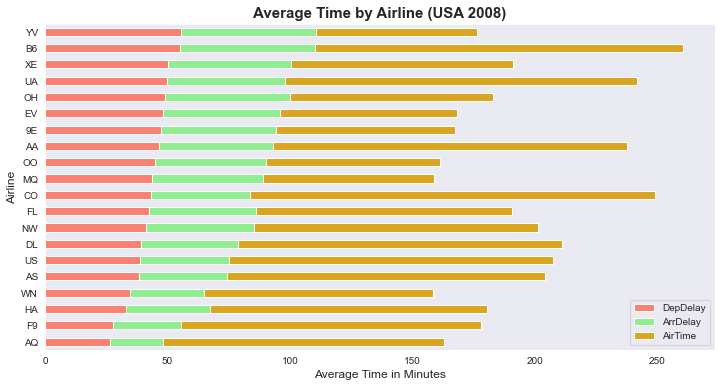

In [51]:
#With the dataframe already created I can plot the data into a stacked bar chart

times_sorted.plot(kind='barh', stacked=True, color=['salmon', 'lightgreen', 'goldenrod'])

plt.legend
plt.title('Average Time by Airline (USA 2008)', size=15, fontweight='bold')
plt.xlabel('Average Time in Minutes', size=12)
plt.ylabel('Airline', size=12)

plt.savefig('Average Time by Airline.png')

plt.show()

By comparing these three variables, we can see that airlines such as YV, OH, XE accumulate more delay than actual air time meaning that they are not efficient at all in terms of flight management (the customer spends more time dealing with delays than the time they spend on air). 

### Exercici 2

*Exporta els gràfics com imatges o com html*

Done! I've been saving the plots as created

### Exercici 3

*Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.*

Uploaded on Github